# Problem Set #6
# MACS 30150, Dr. Evans

## Submitted by- Nipun Thakurele

In [168]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import statsmodels.api as sm
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from pylab import rcParams
from sklearn import datasets, neighbors, linear_model
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

## Question 1

## 1(a)

In [169]:
url = ('https://raw.githubusercontent.com/nt546/persp-model-econ_W19/' +
      'master/ProblemSets/PS6/data/Auto.csv')
df = pd.read_csv(url, na_values='?')
df.dropna(inplace=True)
print(df.shape)
df.head()

(392, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


## 1(b)

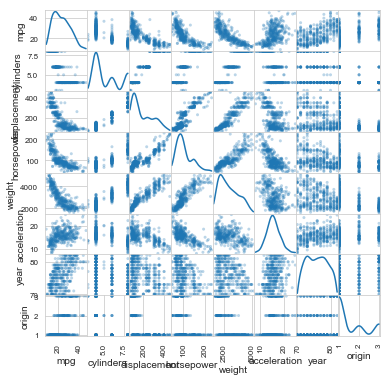

In [170]:
from pandas.plotting import scatter_matrix
df_quant=df[['mpg','cylinders','displacement','horsepower',
             'weight','acceleration','year','origin']]
scatter_matrix(df_quant, alpha=0.3, figsize=(6, 6),diagonal='kde')
plt.show()

## 1(c)

In [171]:
df_quant.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


## 1(d)

In [172]:
mpg_ = df_quant['mpg']
df_quant['constants'] = 1
model_ = df_quant[['constants', 'cylinders', 'displacement', 'horsepower', 'weight',
                              'acceleration', 'year', 'origin']]
l_reg = sm.OLS(mpg_, model_).fit()
print(l_reg.params)
print(l_reg.summary())

constants      -17.218435
cylinders       -0.493376
displacement     0.019896
horsepower      -0.016951
weight          -0.006474
acceleration     0.080576
year             0.750773
origin           1.426140
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Wed, 20 Feb 2019   Prob (F-statistic):          2.04e-139
Time:                        10:56:48   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                             

**i.** The coefficients of displacement, weight, year and origin are statistically significant at 1% level.


**ii.** The coefficients of cylinders, horsepower and acceleration aren't statistically significant at 10% level



**iii.** The coefficient of year(i) is 0.7508 which means that everything else being equal, 
    an increase in year by one results in 0.7508 units increase in mpg.

## 1(e)

**i.**

In [191]:
df_quant['constants'] = 1
df_quant['weight_2'] = df_quant['weight'] ** 2
df_quant['displacement_2'] = df_quant['displacement'] ** 2
df_quant['horsepower_2'] = df_quant['horsepower'] ** 2
df_quant['acceleration_2'] = df_quant['acceleration'] ** 2

mpg_ = df_quant['mpg']
model_1 = df_quant[['constants', 'cylinders', 'displacement', 'displacement_2', 'horsepower', 'horsepower_2',
                    'weight', 'weight_2', 'acceleration', 'acceleration_2', 'year', 'origin']]

l_reg_1 = sm.OLS(mpg_, model_1).fit()
print(l_reg_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.2
Date:                Wed, 20 Feb 2019   Prob (F-statistic):          1.75e-160
Time:                        10:57:27   Log-Likelihood:                -962.02
No. Observations:                 392   AIC:                             1948.
Df Residuals:                     380   BIC:                             1996.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
constants         20.1084      6.696      3.

**ii.** The adj. R^2 value of new model is 0.866. The adj. R^2 value of previous model was 0.818 which means that the 
adjusted R^2 value of the new model has improved from the previous model.

**iii.** The displacement variable is no longer statistically significant. The displacement_2 (square of the displacement variable) is also not statistically significant.

**iv.** The cylinders variable is also not statistically significant under the new model.

## 1(f)

In [174]:
l_reg_1.predict([1, 6, 200, 200**2, 100, 100**2, 3100, 3100**2, 15.1, 15.1**2, 99, 1])

array([38.7321111])

The predicted miles per gallon mpg of the given car would be 38.732 mpg.

## Question 2

## 2(a)

In [175]:
def distance_KNN(x, y):
    x1, x2, x3 = x
    y1, y2, y3 = y
    return np.sqrt((x1 - y1)**2 + (x2 - y2)**2 + (x3 - y3)**2)

In [176]:
x = (0,0,0)

print("Euclidean distance between observation 1 and the test point is", distance_KNN(x, (0, 3, 0)))
print("Euclidean distance between observation 2 and the test point is", distance_KNN(x, (2, 0, 0)))
print("Euclidean distance between observation 3 and the test point is", distance_KNN(x, (0, 1, 3)))
print("Euclidean distance between observation 4 and the test point is", distance_KNN(x, (0, 1, 2)))
print("Euclidean distance between observation 5 and the test point is", distance_KNN(x, (-1, 0, 1)))
print("Euclidean distance between observation 6 and the test point is", distance_KNN(x, (1, 1, 1)))

Euclidean distance between observation 1 and the test point is 3.0
Euclidean distance between observation 2 and the test point is 2.0
Euclidean distance between observation 3 and the test point is 3.1622776601683795
Euclidean distance between observation 4 and the test point is 2.23606797749979
Euclidean distance between observation 5 and the test point is 1.4142135623730951
Euclidean distance between observation 6 and the test point is 1.7320508075688772


## 2(b)

KNN prediction for K = 1 is green as the observation 5 (green color) is the closest neighbor to the test point x.

## 2(c)

KNN prediction for K = 3 is red as out of the three closest neighbors (5, 6 and 2), observation 5 is green 
while observations 6 and 2 are red. Hence, the probability of red (2/3) is greater than the probability of green (1/3).

## 2(d)

If the Bayes (optimal) Decision Boundary is highly nonlinear, then the best value for K is expected to be small.
This is because as K gets small, the boundary line gets rough while it is smoother for larger value of K 
(which is good for linear boundary).

## 2(e)

In [177]:
data = {'X1' : [0, 2, 0 , 0, -1, 1], 'X2' : [3, 0, 1, 1, 0, 1], \
           'X3' : [0, 0, 3, 2, 1, 1], 'Y' : ['Red', 'Red', 'Red', 'Green', 'Green', 'Red']}

knn = pd.DataFrame.from_dict(data)

y = knn['Y']
x = np.column_stack((knn['X1'], knn['X2'], knn['X3']))

knn_classifier_model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=2)
knn_pred = knn_classifier.fit(x, y)
prediction = knn_pred.predict([(1, 1, 1)])
prediction

array(['Green'], dtype=object)

In [178]:
print('The estimated KNN classifier of the test point (1, 1, 1) with K = 2 is ', prediction)

The estimated KNN classifier of the test point (1, 1, 1) with K = 2 is  ['Green']


## Problem 3

In [179]:
df_quant.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,constants,weight_2,displacement_2,horsepower_2,acceleration_2
0,18.0,8,307.0,130.0,3504,12.0,70,1,1,12278016,94249.0,16900.0,144.00
1,15.0,8,350.0,165.0,3693,11.5,70,1,1,13638249,122500.0,27225.0,132.25
2,18.0,8,318.0,150.0,3436,11.0,70,1,1,11806096,101124.0,22500.0,121.00
3,16.0,8,304.0,150.0,3433,12.0,70,1,1,11785489,92416.0,22500.0,144.00
4,17.0,8,302.0,140.0,3449,10.5,70,1,1,11895601,91204.0,19600.0,110.25


In [180]:
print(df_quant['mpg'].median())

22.75


In [181]:
df_quant['mpg_high'] = (df_quant['mpg'] >= df_quant['mpg'].median()).astype(int)

In [182]:
df_quant.dropna()
df_quant.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,constants,weight_2,displacement_2,horsepower_2,acceleration_2,mpg_high
0,18.0,8,307.0,130.0,3504,12.0,70,1,1,12278016,94249.0,16900.0,144.00,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,1,13638249,122500.0,27225.0,132.25,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,1,11806096,101124.0,22500.0,121.00,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,1,11785489,92416.0,22500.0,144.00,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,1,11895601,91204.0,19600.0,110.25,0


## 3(a)

In [183]:
import warnings
warnings.filterwarnings("ignore")

cols = ['cylinders','displacement','horsepower','weight','acceleration','year','origin']
x = df_quant[cols]
x['constant'] = 1
y = df_quant['mpg_high']

LogitModel = sm.Logit(y, x, missing='drop')
LogitReg_sm = LogitModel.fit()
LogitReg_sm.summary()

Optimization terminated successfully.
         Current function value: 0.200944
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               mpg_high   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Wed, 20 Feb 2019   Pseudo R-squ.:                  0.7101
Time:                        10:56:51   Log-Likelihood:                -78.770
converged:                       True   LL-Null:                       -271.71
                                        LLR p-value:                 2.531e-79
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -0.1626      0.423     -0.384      0.701      -0.992       0.667
displacement     0.0021      0.012      0.174      0.862      -0.021       0.026
horsepower      -0.0410      0.024     -1.718      0.086      -0.088       0.006
weight          -0.0043      0.001     -3.784      0.000      -0.007      -0.002
acceleration     0.0161      0.141      0.114      0.910      -0.261       0.293
year             0.4295      0.075      5.709      0.000       0.282       0.577
origin           0.4773      0.362      1.319      0.187      -0.232       1.187
constant       -17.1549      5.764     -2.976      0.003     -28.452      -5.858
================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

The regressors weight and year are statistically significant at the 5% level.

## 3(b)

In [184]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=10)

## 3(c)

In [185]:
import warnings
warnings.filterwarnings("ignore")

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [186]:
LogReg.coef_

array([[-0.33709221,  0.000466  , -0.05200648, -0.00490103, -0.18191715,
         0.30925357, -0.09542257, -0.032587  ]])

In [187]:
LogReg.intercept_

array([-0.032587])

**The coefficients are:** <br>
    cylinders : -0.33709   <br>   displacement : 0.00046 <br>
    horsepower : -0.05200  <br>   weight : -0.00490 <br>
    acceleration : -0.18191 <br>  year : 0.30925 <br>
    origin : -0.09542    <br>     constant : -0.03258 

## 3(d)

In [188]:
y_pred = LogReg.predict(X_test)

In [189]:
from sklearn.metrics import confusion_matrix
c_m = confusion_matrix(y_test, y_pred)
c_m

array([[86, 13],
       [12, 85]])

In [190]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87        99
           1       0.87      0.88      0.87        97

   micro avg       0.87      0.87      0.87       196
   macro avg       0.87      0.87      0.87       196
weighted avg       0.87      0.87      0.87       196



The precision values for both low mpg and high mpg are almost similar
but precision value for low mpg (0.88) is slightly higher than that of high mpg value (0.87).
Hence, the model predicts low mpg slightly better than high mpg.